In [1]:
import matplotlib.style
matplotlib.style.use('/home/thomas.callister/.matplotlib/matplotlibrc')
import matplotlib.pyplot as plt
import numpy as np
from scipy.special import gammainc

/home/thomas.callister/.local/lib/python2.7/site-packages/matplotlib/style/core.py:51: UserWarning: Style includes a parameter, 'backend', that is not related to style.  Ignoring
  "to style.  Ignoring".format(key))


In [2]:
# Import precomputed grid of binary formation rates as a function of merger redshift and time delay
rateData = np.load('./../code/delayedRateData.npy',allow_pickle=True)[()]
formationRates = rateData['formationRates']
tdelays = rateData['tds']
zs = rateData['zs']
zformation = rateData['formationRedshifts']

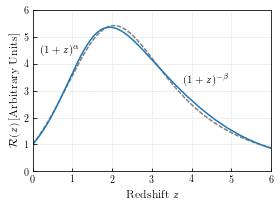

In [214]:
# Metallicity weights at redshift z
fs = gammainc(0.84,(0.3**2.)*np.power(10.,0.3*zformation))
weightedFormationRates = formationRates*fs

lmbda = -1
dpdt = np.power(tdelays,lmbda)
dpdt[tdelays<0.05] = 0.
dpdt[tdelays>13.5] = 0.
mergerRate = weightedFormationRates.dot(dpdt)

fig,ax = plt.subplots()
#ax.plot(zs,formationRates[:,0]/formationRates[0,0])
#ax.plot(zs,weightedFormationRates[:,0]/np.max(weightedFormationRates[:,0]))

ax.plot(zs,mergerRate/mergerRate[0])

alpha,beta,zpeak = 1.91530569, 3.4001468 , 2.39617818
rs = np.power(1.+zs,alpha)/(1.+np.power((1.+zs)/(1.+zpeak),alpha+beta))
ax.plot(zs,rs/rs[0],color='grey',dashes=(3,1),zorder=-1)

ax.set_xlabel('Redshift $z$')
ax.set_ylabel(r'$\mathcal{R}(z)$\,[Arbitrary Units]')
ax.text(3.8,3.3,r'$(1+z)^{-\beta}$',fontsize=11)
ax.text(0.2,4.4,r'$(1+z)^\alpha$',fontsize=11)
ax.set_xlim(0,6)
ax.set_ylim(0,6)

plt.tight_layout()
plt.savefig('delayedRateModel.pdf',bbox_inches='tight')
plt.show()

In [173]:
def test(x):
    alpha = x[0]
    beta = x[1]
    zpeak = x[2]
    
    rs = np.power(1.+zs,alpha)/(1.+np.power((1.+zs)/(1.+zpeak),alpha+beta))
    return rs/rs[0]-mergerRate/mergerRate[0]

In [174]:
from scipy.optimize import least_squares
res = least_squares(test,[2.,3.,2.])
res.x

In [41]:
mergerRate

array([0.00000000e+00, 3.54032299e+02, 1.39618404e+03, 3.09044528e+03,
       5.39451933e+03, 8.26199637e+03, 1.16443092e+04, 1.54924181e+04,
       1.97581971e+04, 2.43955056e+04, 2.93404399e+04, 3.45534306e+04,
       4.00142586e+04, 4.56927218e+04, 5.15634650e+04, 5.75913929e+04,
       6.37482265e+04, 7.00073533e+04, 7.63437579e+04, 8.27339521e+04,
       8.91679250e+04, 9.56151171e+04, 1.02056470e+05, 1.08474224e+05,
       1.14851859e+05, 1.21174029e+05, 1.27444329e+05, 1.33615277e+05,
       1.39711364e+05, 1.45703834e+05, 1.51582682e+05, 1.57338785e+05,
       1.62987590e+05, 1.68475393e+05, 1.73843683e+05, 1.79036448e+05,
       1.84100641e+05, 1.89006032e+05, 1.93748703e+05, 1.98325287e+05,
       2.02732937e+05, 2.07001932e+05, 2.11066461e+05, 2.14990960e+05,
       2.18741967e+05, 2.22319044e+05, 2.25685463e+05, 2.28951373e+05,
       2.32007379e+05, 2.34890913e+05, 2.37603008e+05, 2.40185771e+05,
       2.42560362e+05, 2.44810519e+05, 2.46897505e+05, 2.48780253e+05,
      

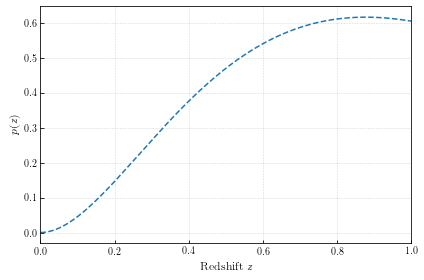

In [62]:
# Metallicity weights at redshift z
logZ = 0
fs = gammainc(0.84,((10.**logZ)**2.)*np.power(10.,0.3*zformation))
weightedFormationRates = formationRates*fs

lmbda = 0
dpdt = np.power(tdelays,lmbda)
dpdt[tdelays<0.05] = 0.
dpdt[tdelays>13.5] = 0.
mergerRate = weightedFormationRates.dot(dpdt)

ref_zs,ref_dcs,ref_dLs,ref_dVc_dz = np.loadtxt('./../../code/redshiftData.dat',usecols=(0,1,2,3),unpack=True)
dVdzMerger = np.interp(zs,ref_zs,ref_dVc_dz)

pz = dVdzMerger*mergerRate/(1.+zs)
pz /= np.trapz(pz,zs)

fig,ax = plt.subplots()
#ax.plot(zs,formationRates[:,0]/np.max(formationRates[:,0]))
#ax.plot(zs,weightedFormationRates[:,0]/np.max(weightedFormationRates[:,0]))
ax.plot(zs,pz,ls='--')
ax.set_xlabel('Redshift $z$')
ax.set_ylabel(r'$p(z)$')
ax.set_xlim(0,1)
plt.tight_layout()
plt.show()

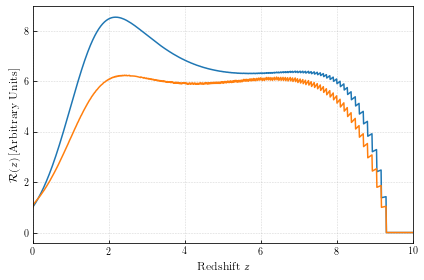

In [23]:
# Metallicity weights at redshift z
fs = gammainc(0.84,(0.01**2.)*np.power(10.,0.3*zs))[...,None]
weightedFormationRates = formationRates*fs

fs_alt = gammainc(0.84,(0.01**2.)*np.power(10.,0.3*zformation))
weightedFormationRates_alt = formationRates*fs_alt

lmbda = -1
dpdt = np.power(tdelays,lmbda)
dpdt[tdelays<0.05] = 0.
dpdt[tdelays>13.5] = 0.
mergerRate = weightedFormationRates.dot(dpdt)
mergerRate_alt = weightedFormationRates_alt.dot(dpdt)

fig,ax = plt.subplots()

#ax.plot(zs,weightedFormationRates[:,0]/weightedFormationRates[0,0])
#ax.plot(zs,weightedFormationRates_alt[:,0]/weightedFormationRates_alt[0,0])

ax.plot(zs,mergerRate/mergerRate[0])
ax.plot(zs,mergerRate_alt/mergerRate_alt[0])

ax.set_xlabel('Redshift $z$')
ax.set_ylabel(r'$\mathcal{R}(z)$\,[Arbitrary Units]')
ax.set_xlim(0,10)
plt.tight_layout()
plt.show()

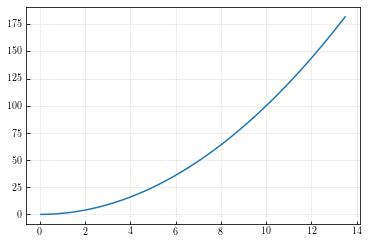

In [22]:
plt.plot(tdelays,np.power(tdelays,2))